In [1]:
!pip install openpyxl


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, TensorDataset
# 指定文件路径
file_path = '附件一（训练集）.xlsx'

# 使用pandas的read_excel函数读取数据
df = pd.read_excel(file_path)

# 显示数据框架的前几行，以确保数据被正确读取
print(df.head())

   温度，oC  频率，Hz    磁芯损耗，w/m3 励磁波形  0（磁通密度B，T）         1         2         3  \
0     25  50030  1997.955250  正弦波    0.000213  0.000389  0.000566  0.000743   
1     25  50020  2427.749830  正弦波   -0.000551 -0.000358 -0.000165  0.000028   
2     25  50020  3332.725760  正弦波   -0.003780 -0.003564 -0.003349 -0.003134   
3     25  50020  4502.908007  正弦波   -0.000511 -0.000267 -0.000023  0.000222   
4     25  50030  6063.023248  正弦波    0.000458  0.000732  0.001007  0.001281   

          4         5  ...      1014      1015      1016      1017      1018  \
0  0.000919  0.001096  ... -0.001551 -0.001374 -0.001198 -0.001022 -0.000846   
1  0.000221  0.000413  ... -0.002476 -0.002284 -0.002091 -0.001899 -0.001707   
2 -0.002919 -0.002704  ... -0.005927 -0.005713 -0.005499 -0.005285 -0.005070   
3  0.000466  0.000711  ... -0.002950 -0.002707 -0.002463 -0.002220 -0.001976   
4  0.001555  0.001830  ... -0.002290 -0.002016 -0.001741 -0.001466 -0.001192   

       1019      1020      1021      1022   

In [2]:
# 读取特定的工作表，可以是工作表的名称或索引
df1 = pd.read_excel(file_path, sheet_name='材料4')
df1=df1[df['励磁波形']=='正弦波']
df1

C:\Users\74860\AppData\Local\Temp\ipykernel_20280\300562201.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df1=df1[df['励磁波形']=='正弦波']


,温度，oC,频率，Hz,磁芯损耗，w/m3,励磁波形,0（磁通密度B，T）,1,2,3,4,5,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,25,50020,2525.795337,正弦波,-0.000109,0.000049,0.000207,0.000365,0.000523,0.000681,...,-0.001685,-0.001528,-0.001370,-0.001213,-0.001055,-0.000898,-0.000740,-0.000582,-0.000425,-0.000267
1,25,50020,4427.524958,正弦波,0.000020,0.000215,0.000410,0.000605,0.000801,0.000995,...,-0.001928,-0.001733,-0.001539,-0.001344,-0.001149,-0.000955,-0.000760,-0.000566,-0.000371,-0.000176
2,25,50020,5780.576037,正弦波,0.002607,0.002825,0.003043,0.003260,0.003477,0.003693,...,0.000434,0.000651,0.000869,0.001086,0.001304,0.001521,0.001738,0.001955,0.002173,0.002390
3,25,50020,10983.412600,正弦波,0.003480,0.003759,0.004038,0.004316,0.004595,0.004873,...,0.000696,0.000974,0.001253,0.001531,0.001809,0.002087,0.002365,0.002644,0.002922,0.003201
4,25,50020,14526.685680,正弦波,0.004069,0.004381,0.004693,0.005005,0.005317,0.005628,...,0.000946,0.001258,0.001570,0.001883,0.002195,0.002507,0.002819,0.003132,0.003444,0.003756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,25,396800,42412.471700,三角波,-0.013174,-0.012849,-0.012528,-0.012209,-0.011895,-0.011583,...,-0.015220,-0.015179,-0.015108,-0.014999,-0.014846,-0.014647,-0.014403,-0.014123,-0.013818,-0.013499
1063,25,396800,54351.812730,三角波,-0.014678,-0.014314,-0.013952,-0.013595,-0.013242,-0.012892,...,-0.017036,-0.016983,-0.016895,-0.016763,-0.016581,-0.016348,-0.016067,-0.015748,-0.015403,-0.015043
1064,25,396800,69956.704540,三角波,-0.016519,-0.016109,-0.015702,-0.015300,-0.014903,-0.014509,...,-0.019146,-0.019084,-0.018985,-0.018839,-0.018638,-0.018380,-0.018070,-0.017716,-0.017331,-0.016929
1065,25,396800,114626.134900,三角波,-0.020449,-0.019934,-0.019425,-0.018921,-0.018424,-0.017931,...,-0.023841,-0.023757,-0.023622,-0.023423,-0.023154,-0.022815,-0.022414,-0.021961,-0.021472,-0.020964


In [3]:
import numpy as np
last_1024_columns = df1.iloc[:, -1024:]
df1=df1.iloc[:, :-1025]
# 计算每一行的最大值
df1['B'] = last_1024_columns.max(axis=1)
new_column_names = {
    '温度，oC': 'T',
    '频率，Hz': 'F',
    '磁芯损耗，w/m3': 'P',
    'B': 'B'
}
df1 = df1.rename(columns=new_column_names)
df1[['T','F','P', 'B']] = np.log(df1[['T','F','P', 'B']])
df1

,T,F,P,B
0,3.218876,10.820178,7.834311,-3.659045
1,3.218876,10.820178,8.395596,-3.450843
2,3.218876,10.820178,8.662259,-3.343614
3,3.218876,10.820178,9.304141,-3.094386
4,3.218876,10.820178,9.583743,-2.983443
...,...,...,...,...
1062,3.218876,12.891188,10.655198,-4.133273
1063,3.218876,12.891188,10.903233,-4.017292
1064,3.218876,12.891188,11.155632,-3.899025
1065,3.218876,12.891188,11.649431,-3.674012


In [4]:
import numpy as np
from scipy.optimize import curve_fit

# 定义模型函数
def model_func(X, A, C, D):
    F,B=X
    return A * np.power(F, C) * np.power(B, D)

# 假设你有一些数据
F = np.array(df1['F'])  # 自变量F的值
B = np.array(df1['B'])  # 自变量B的值
P = np.array(df1['P'])  # 因变量P的值

# 将自变量组合成一个二维数组
X_data = np.vstack((F, B))

# 使用curve_fit进行拟合
params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])

A, C, D = params
df1['ypred1']=A * F**C * B**D
mse1 = ((df1['P'] - df1['ypred1']) ** 2).mean()
mse1

C:\Users\74860\AppData\Local\Temp\ipykernel_20280\1040560344.py:7: RuntimeWarning: invalid value encountered in power
  return A * np.power(F, C) * np.power(B, D)
C:\Users\74860\AppData\Local\Temp\ipykernel_20280\1040560344.py:18: OptimizeWarning: Covariance of the parameters could not be estimated
  params, covariance = curve_fit(model_func, X_data, P, p0=[1, 1, 1])


nan

In [5]:
y=df1['P'].values
X=df1[['T','F','B']].values
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.00001, random_state=42)
if torch.cuda.is_available():
    train_dataset = TensorDataset(X_train.to('cuda:0'), y_train.to('cuda:0'))
    test_dataset = TensorDataset(X_test.to('cuda:0'), y_test.to('cuda:0'))

# 创建一个字典来存储数据集
dataset = {
    'train_input': train_dataset.tensors[0],
    'test_input': test_dataset.tensors[0],
    'train_label': train_dataset.tensors[1],
    'test_label':test_dataset.tensors[1]
}
dataset

{'train_input': tensor([[ 4.4998, 11.1682, -3.2497],
         [ 3.2189, 12.7794, -4.3652],
         [ 3.2189, 11.7429, -3.3521],
         ...,
         [ 3.2189, 12.0885, -3.3470],
         [ 3.2189, 12.6650, -3.6883],
         [ 4.2485, 12.0886, -3.5885]], device='cuda:0'),
 'test_input': tensor([[ 4.4998, 11.8584, -3.1267]], device='cuda:0'),
 'train_label': tensor([[ 8.1163],
         [ 8.5728],
         [ 9.6848],
         ...,
         [10.1374],
         [11.1180],
         [ 8.8271]], device='cuda:0'),
 'test_label': tensor([[9.4244]], device='cuda:0')}

In [6]:
import torch
torch.set_default_dtype(torch.float64) # 设置默认张量数据类型为双精度浮点数
torch.manual_seed(33) # 设置随机数种子为33
from kan import *
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# 创建一个KAN模型：
# 输入维度为2，输出维度为1，隐藏层有5个神经元
# 使用三次样条（k=3），将输入空间划分为5个网格间隔（grid=5）
# 设置随机数种子为0
model = KAN(width=[3,5,1], grid=5, k=3, seed=0,device=device)

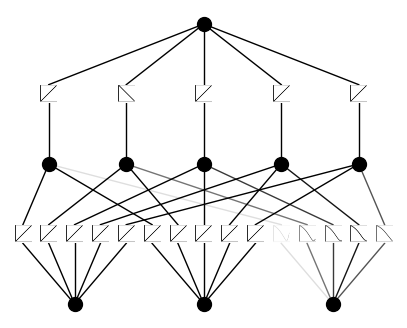

In [7]:
# 绘制初始化时的KAN模型图形
model(dataset['train_input']);
# 使用 plot 方法绘制模型的输出结果
# 设置 beta 参数为 100，用于控制平滑度
model.plot(beta=50)

In [8]:
# 对模型进行训练
# 使用 LBFGS 优化器
# 进行 20 步训练
# 设置正则化参数为 0.01
# 设置信息熵正则化参数为 10.0
# 在给定的设备上进行训练
model.train(dataset, opt="LBFGS", steps=40, lamb=0.01, lamb_entropy=10.,device=device);

description:   0%|                                                           | 0/40 [00:00<?, ?it/s]c:\Users\74860\Desktop\deep learning\kanmodel\kan\KAN.py:327: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\ReduceOps.cpp:1760.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))
train loss: 2.43e-01 | test loss: 1.96e-01 | reg: 3.32e+01 : 100%|██| 40/40 [00:16<00:00,  2.41it/s]


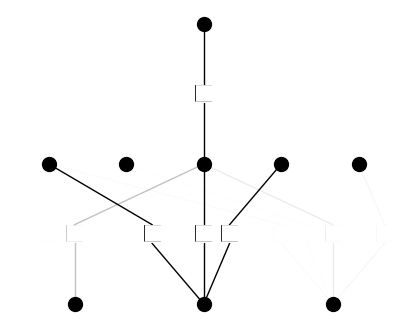

In [9]:
model.plot() # 使用 plot 方法绘制训练后的KAN模型

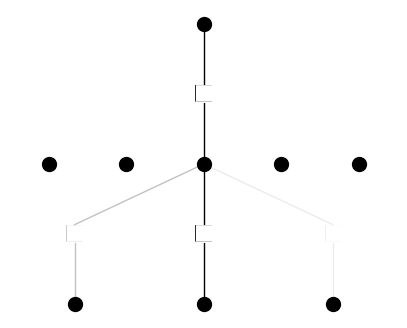

In [10]:
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)

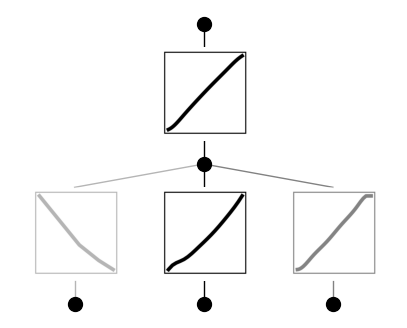

In [11]:
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 2.46e-01 | test loss: 2.29e-01 | reg: 1.40e+01 : 100%|██| 20/20 [00:05<00:00,  4.00it/s]


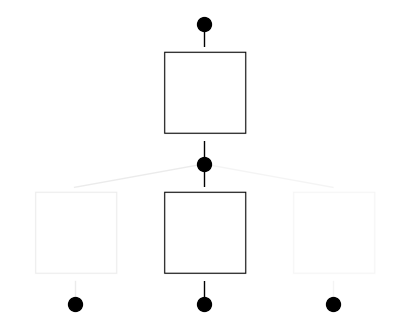

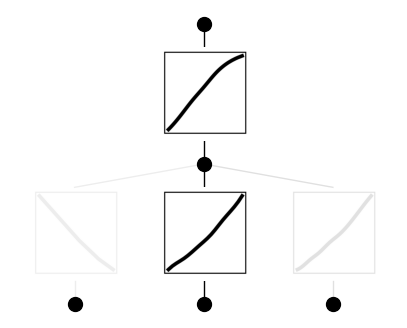

In [13]:
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 2.39e-01 | test loss: 1.62e-01 | reg: 1.61e+01 : 100%|████| 5/5 [00:01<00:00,  3.55it/s]


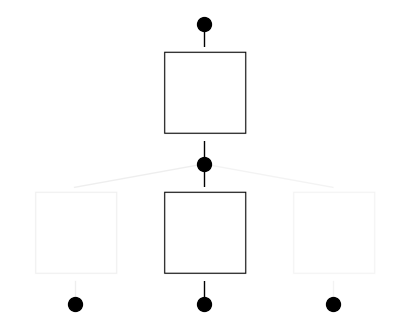

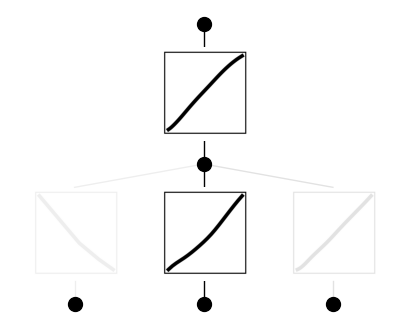

In [14]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

train loss: 2.44e-01 | test loss: 1.55e-01 | reg: 1.72e+01 : 100%|████| 5/5 [00:01<00:00,  2.95it/s]


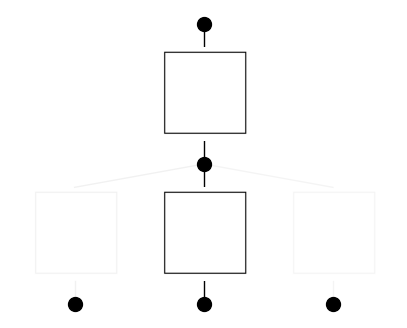

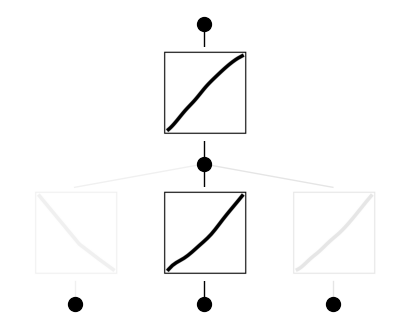

In [15]:
model.train(dataset, opt="LBFGS", steps=5, lamb=0.01, lamb_entropy=10.,device=device);
# 对KAN模型进行修剪
model.prune()
# 使用 plot 方法绘制修剪后的KAN模型
# 设置 mask=True 以保持原始形状
model.plot(mask=True)
model = model.prune()
# 使用修剪后的模型对训练输入数据进行预测
model(dataset['train_input'])
# 使用 plot 方法绘制修剪后的KAN模型的输出结果
model.plot()

In [18]:
X_train

tensor([[ 4.2485, 11.7429, -2.9003],
        [ 3.2189, 11.8584, -1.5268],
        [ 3.2189, 11.3973, -3.9276],
        ...,
        [ 3.2189, 11.5124, -1.5167],
        [ 4.4998, 12.5491, -3.5864],
        [ 4.4998, 11.2830, -2.4408]], dtype=torch.float32)

In [21]:
# import shap
# explainer = shap.Explainer(model.model_predict,dataset['train_input'].cpu().numpy())  # 使用预测函数
# shap_values = explainer(dataset['train_input'].cpu().numpy())


TypeError: model_predict() takes 1 positional argument but 2 were given

In [16]:
# 设置 mode 变量为 "auto" 或 "manual"，以确定激活函数的设置方式
mode = "auto"  # 或者 mode = "manual"
# 如果 mode 是 "manual"，则手动设置激活函数为符号函数
if mode == "manual":
    # 手动模式下，逐个指定隐藏层和输入层的激活函数
    # 第一个参数表示层的索引，第二个和第三个参数表示神经元的索引
    # 第四个参数为要设置的激活函数，例如 'sin', 'x^2', 'exp' 等
    model.fix_symbolic(0,0,0,'x'); # 设置第一个隐藏层的第一个神经元的激活函数为正弦函数
    model.fix_symbolic(0,1,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(0,2,0,'x'); # 设置第一个隐藏层的第二个神经元的激活函数为平方函数
    model.fix_symbolic(1,0,0,'x'); # 设置输出层的第一个神经元的激活函数为指数函数
# 如果 mode 是 "auto"，则自动设置激活函数为符号函数
elif mode == "auto":
    # 自动模式下，根据提供的激活函数库自动选择合适的符号函数作为激活函数
    lib = ['x']
    model.auto_symbolic(lib=lib)

fixing (0,0,0) with x, r2=0.9887812822515869
fixing (0,1,0) with x, r2=0.9836252963358637
fixing (0,2,0) with x, r2=0.997478790751343
fixing (1,0,0) with x, r2=0.9981058490810767


In [18]:
model.symbolic_formula()[0][0] # 获取模型的符号化公式
df1['ypred']=-0.76*df1['T']+1.65*df1['F']+2.57*df1['B']+1.57
# df1

In [19]:
!pip install statsmodels


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
X = df1[['F', 'B']]
y=df1['P']
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5690.
Date:                Mon, 23 Sep 2024   Prob (F-statistic):               0.00
Time:                        11:38:03   Log-Likelihood:                -739.49
No. Observations:                1067   AIC:                             1485.
Df Residuals:                    1064   BIC:                             1500.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.9365      0.294     -6.590      0.0

In [21]:
df1['ypred1']=-1.9365+  1.6925*df1['F']+2.5326*df1['B']
df1

,T,F,P,B,ypred1,ypred
0,3.218876,10.820178,7.834311,-3.659045,7.109754,7.573202
1,3.218876,10.820178,8.395596,-3.450843,7.637047,8.108283
2,3.218876,10.820178,8.662259,-3.343614,7.908615,8.383860
3,3.218876,10.820178,9.304141,-3.094386,8.539810,9.024377
4,3.218876,10.820178,9.583743,-2.983443,8.820784,9.309500
...,...,...,...,...,...,...
1062,3.218876,12.891188,10.655198,-4.133273,9.413908,9.771603
1063,3.218876,12.891188,10.903233,-4.017292,9.707642,10.069675
1064,3.218876,12.891188,11.155632,-3.899025,10.007166,10.373621
1065,3.218876,12.891188,11.649431,-3.674012,10.577033,10.951903


In [22]:
mse = ((np.exp(df1['P']) - np.exp(df1['ypred'])) ** 2).mean()
mse1 = ((np.exp(df1['P']) - np.exp(df1['ypred1'])) ** 2).mean()
print(mse,mse1)

365466573.9436085 1532679836.3029912


: 